In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip list

In [3]:
df = pd.read_csv("credit_customers.csv")

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [5]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df['class']

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: object

In [7]:
#Function to explore the dataset
def descriptive(df):
    for col in df.columns.values:
        if (col!="credit_amount"):
            print(col)
            print("What different values does this coulumn contains:",df[col].unique())
            print("Total missing values in a variable:",len(df[df[col].isna()]))
            print("")

In [8]:
descriptive(df)

checking_status
What different values does this coulumn contains: ['<0' '0<=X<200' 'no checking' '>=200']
Total missing values in a variable: 0

duration
What different values does this coulumn contains: [ 6. 48. 12. 42. 24. 36. 30. 15.  9. 10.  7. 60. 18. 45. 11. 27.  8. 54.
 20. 14. 33. 21. 16.  4. 47. 13. 22. 39. 28.  5. 26. 72. 40.]
Total missing values in a variable: 0

credit_history
What different values does this coulumn contains: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
Total missing values in a variable: 0

purpose
What different values does this coulumn contains: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
Total missing values in a variable: 0

savings_status
What different values does this coulumn contains: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
Total missing values in a variable: 0

employment
What

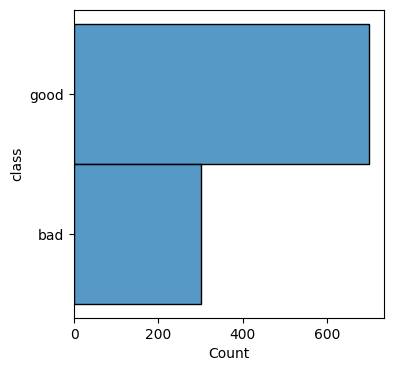

In [9]:
plt.figure(figsize=(4, 4))
sns.histplot(
    y='class', 
    data=df, 
)
plt.show()

Surprisingly there are quite alot of bad credits  

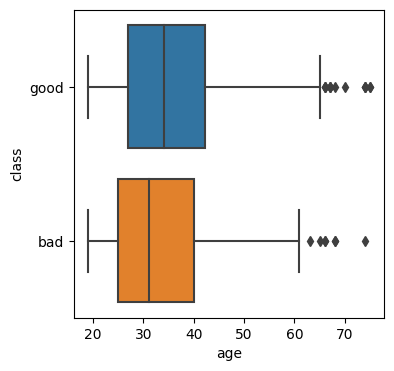

In [10]:
plt.figure(figsize=(4, 4))
sns.boxplot(
    y='class', 
    x='age', 
    data=df, 
)
plt.show()

The older person is the better chance he has to get a good credit score?

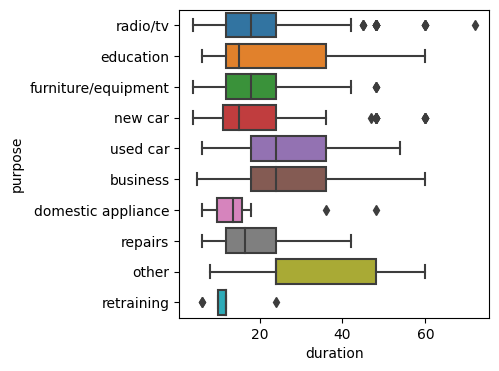

In [11]:
plt.figure(figsize=(4, 4))
sns.boxplot(
    y='purpose', 
    x='duration', 
    data=df, 
)
plt.show()

In [12]:
df['foreign_worker'].value_counts()

foreign_worker
yes    963
no      37
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

<Figure size 600x600 with 0 Axes>

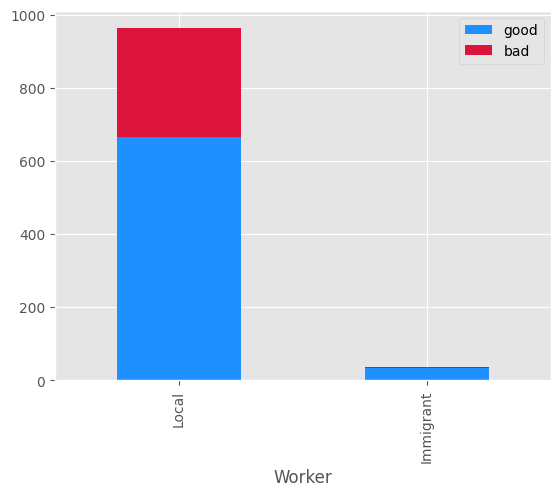

In [13]:
local_bad_worker = df[(df['foreign_worker'] == 'yes') & (df['class'] == 'bad')]
local_good_worker = df[(df['foreign_worker'] == 'yes') & (df['class'] == 'good')]
foreign_bad_worker = df[(df['foreign_worker'] == 'no') & (df['class'] == 'bad')]
foreign_good_worker = df[(df['foreign_worker'] == 'no') & (df['class'] == 'good')]
worker_credit = pd.DataFrame(
    {'Worker': ['Local', 'Immigrant'],
     'good': [len(local_good_worker), len(foreign_good_worker)],
     'bad': [len(local_bad_worker), len(foreign_bad_worker)],})
plt.clf()
plt.figure(figsize=(6, 6))
plt.style.use('ggplot')
worker_credit.set_index('Worker').plot(kind='bar', stacked=True, color=['DodgerBlue', 'Crimson'])
plt.show()

Surprisingly the percentage of immigant(foreign) workers who got the good credit score is higher then it is for local workers

purpose for credit Vs class


<Axes: xlabel='purpose', ylabel='count'>

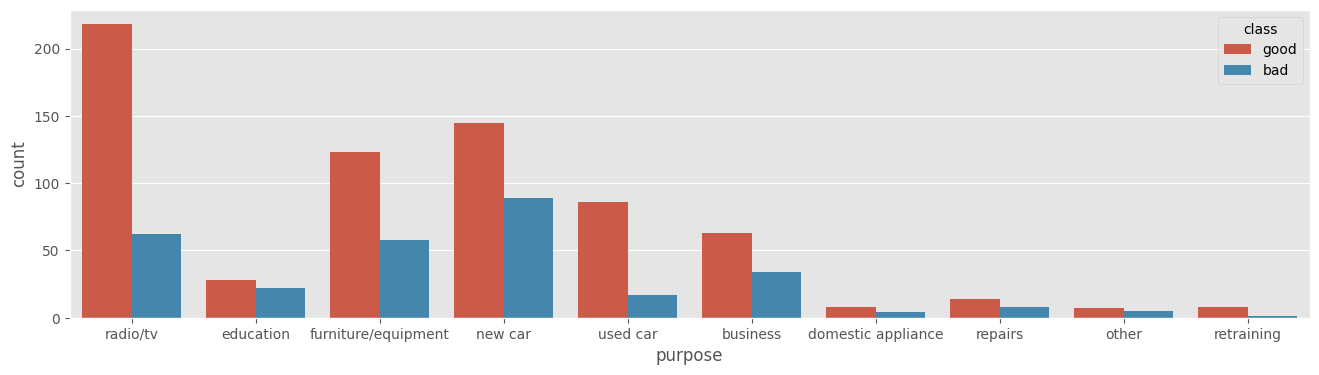

In [14]:
print("purpose for credit Vs class")
plt.figure(figsize=(16,4))
sns.countplot(x="purpose",hue="class",data=df)

purpose for credit Vs class


<Axes: xlabel='job', ylabel='count'>

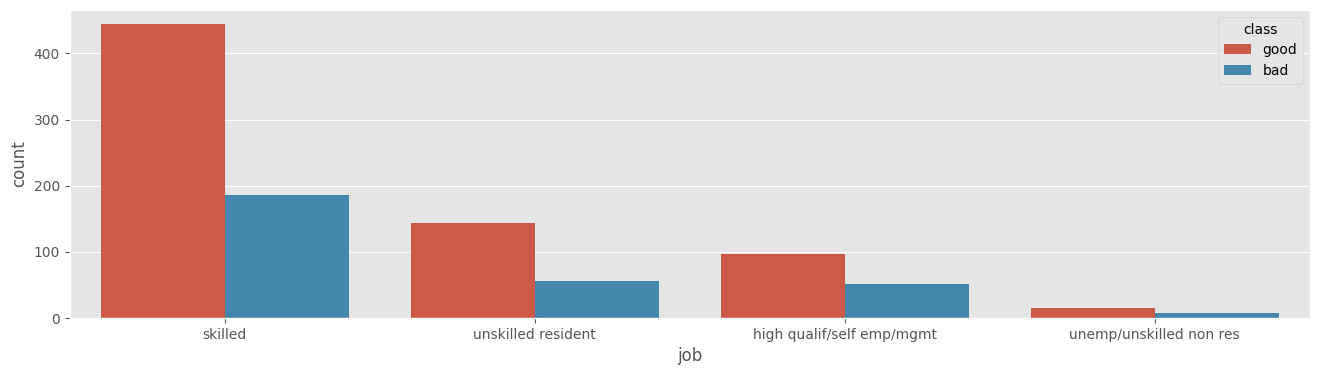

In [15]:
print("purpose for credit Vs class")
plt.figure(figsize=(16,4))
sns.countplot(x="job",hue="class",data=df)

purpose for credit Vs class


<Axes: xlabel='personal_status', ylabel='count'>

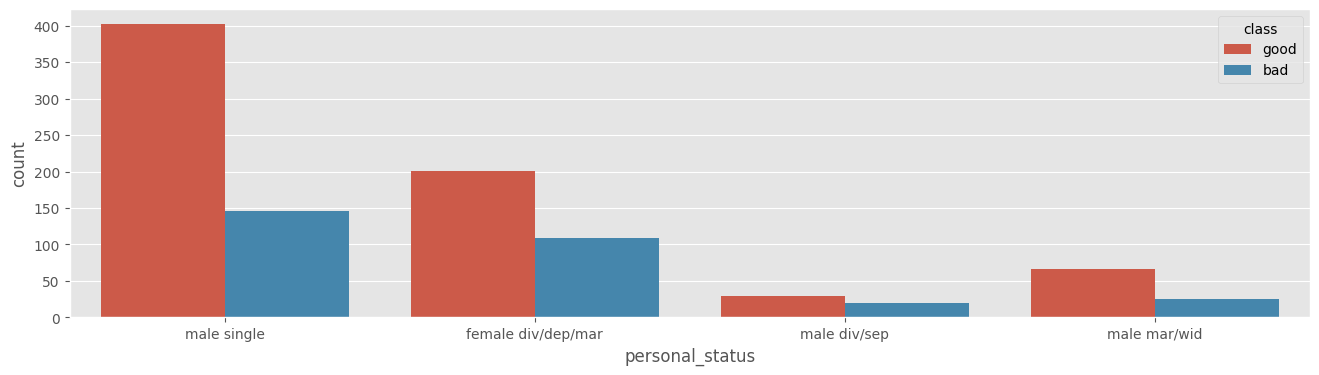

In [16]:
print("purpose for credit Vs class")
plt.figure(figsize=(16,4))
sns.countplot(x="personal_status",hue="class",data=df)

Data preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [18]:
cols = df.columns
num_cols = df._get_numeric_data().columns

In [19]:
list(num_cols)

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [20]:
print("There are a total of", len(list(num_cols)), "numeric variables")

There are a total of 7 numeric variables


In [21]:
num_cols
list(set(cols) - set(num_cols))

['foreign_worker',
 'other_parties',
 'housing',
 'property_magnitude',
 'class',
 'other_payment_plans',
 'employment',
 'credit_history',
 'savings_status',
 'personal_status',
 'job',
 'own_telephone',
 'checking_status',
 'purpose']

In [22]:
print("There are a total of", len(list(set(cols) - set(num_cols))), "categorical variables")

There are a total of 14 categorical variables


In [23]:
for col in list(set(cols) - set(num_cols)):
        if (col!="credit_amount"):
            print(col)
            print("What different values does this coulumn contains:",df[col].unique())

foreign_worker
What different values does this coulumn contains: ['yes' 'no']
other_parties
What different values does this coulumn contains: ['none' 'guarantor' 'co applicant']
housing
What different values does this coulumn contains: ['own' 'for free' 'rent']
property_magnitude
What different values does this coulumn contains: ['real estate' 'life insurance' 'no known property' 'car']
class
What different values does this coulumn contains: ['good' 'bad']
other_payment_plans
What different values does this coulumn contains: ['none' 'bank' 'stores']
employment
What different values does this coulumn contains: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
credit_history
What different values does this coulumn contains: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
savings_status
What different values does this coulumn contains: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
personal_status
What different values d

In [24]:
#encoding categorical data
df['credit_history'] = df['credit_history'].map({'critical/other existing credit':0, 'existing paid':1,'delayed previously':2, 'no credits/all paid':3, 'all paid':4}).astype(int)
#df['class'] = df['class'].map({'good':1, 'bad':0}).astype(int)
df['housing'] = df['housing'].map({'own':1,'for free':0,'rent':2}).astype(int)
df['checking_status'] = df['checking_status'].map({'<0':0, '0<=X<200':1, 'no checking':2, '>=200':3}).astype(int)
df['personal_status'] = df['personal_status'].map({'male single':0, 'female div/dep/mar':1, 'male div/sep':2, 'male mar/wid':3}).astype(int)
df['savings_status'] = df['savings_status'].map({'no known savings':0, '<100':1, '500<=X<1000':2, '>=1000':3,'100<=X<500':4}).astype(int)
df['own_telephone'] = df['own_telephone'].map({'none': 0, 'yes': 1}).astype(int)
df['foreign_worker'] = df['foreign_worker'].map({'no': 0, 'yes': 1}).astype(int)
df['purpose'] = df['purpose'].map({'radio/tv':0,'education':1,'furniture/equipment':2,'new car':3,'used car':4,'business':3, 'domestic appliance':4, 'repairs':5, 'other':6, 'retraining':7}).astype(int)
df['property_magnitude'] = df['property_magnitude'].map({'real estate':1,'no known property':0,'life insurance':2,'car':3}).astype(int)
df['employment'] = df['employment'].map({'>=7':1, '1<=X<4':2, '4<=X<7':3,'unemployed':0, '<1':4}).astype(int)
df['other_payment_plans'] = df['other_payment_plans'].map({'none':0,'bank':1,'stores':2}).astype(int)
df['other_parties'] = df['other_parties'].map({'guarantor':1,'none':0,'co applicant':2}).astype(int)
df['job'] = df['job'].map({'skilled':1,'unskilled resident':0,'high qualif/self emp/mgmt':2,'unemp/unskilled non res':3}).astype(int)

In [25]:
df['duration'] = df['duration'].astype(int)
df['credit_amount'] = df['credit_amount'].astype(int)
df['installment_commitment'] = df['installment_commitment'].astype(int)
df['residence_since'] = df['residence_since'].astype(int)
df['age'] = df['age'].astype(int)
df['existing_credits'] = df['existing_credits'].astype(int)
df['num_dependents'] = df['num_dependents'].astype(int)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int32  
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   int32  
 3   purpose                 1000 non-null   int32  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int32  
 6   employment              1000 non-null   int32  
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int32  
 9   other_parties           1000 non-null   int32  
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   int32  
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   int32  
 14  housing                 1000 non-null   i

In [26]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0,6.0,0,0,1169.0,0,1,4.0,0,0,...,1,67.0,0,1,2.0,1,1.0,1,1,good
1,1,48.0,1,0,5951.0,1,2,2.0,1,0,...,1,22.0,0,1,1.0,1,1.0,0,1,bad
2,2,12.0,0,1,2096.0,1,3,2.0,0,0,...,1,49.0,0,1,1.0,0,2.0,0,1,good
3,0,42.0,1,2,7882.0,1,3,2.0,0,1,...,2,45.0,0,0,1.0,1,2.0,0,1,good
4,0,24.0,2,3,4870.0,1,2,3.0,0,0,...,0,53.0,0,0,2.0,1,2.0,0,1,bad


In [27]:
correlation = df.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(correlation)

ValueError: could not convert string to float: 'good'

In [28]:
col = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

In [29]:
Y = df['class']
X = df[col]

In [30]:
from sklearn.feature_selection import chi2
scores,values = chi2(X,Y)
p_df = pd.DataFrame()
p_df["features"] = col
p_df["p"] = values.round(2)
p_df.sort_values('p')

,features,p
0,checking_status,0.00
1,duration,0.00
2,credit_history,0.00
4,credit_amount,0.00
13,other_payment_plans,0.00
12,age,0.00
3,purpose,0.10
8,personal_status,0.13
7,installment_commitment,0.14
6,employment,0.21


In [31]:
features=['checking_status','duration','credit_history','purpose','credit_amount','age','other_payment_plans','installment_commitment','personal_status']
X=df[features]
scores,values=chi2(X,Y)
p_df = pd.DataFrame()
p_df["features"] = features
p_df["p"] = values.round(2)
p_df

,features,p
0,checking_status,0.00
1,duration,0.00
2,credit_history,0.00
3,purpose,0.10
4,credit_amount,0.00
5,age,0.00
6,other_payment_plans,0.00
7,installment_commitment,0.14
8,personal_status,0.13


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=1)

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
model1 = LogisticRegression()
model1.fit(X_train, Y_train)
prediction = model1.predict(X_test)
accuracy = accuracy_score(Y_test, prediction)
cm = confusion_matrix(Y_test, prediction)  
print('Accuracy:',(accuracy*100))
print(cm)

Accuracy: 74.0
[[ 33  53]
 [ 25 189]]


e:\Учеба\Магистратура 2 семестр\Методы машинного обучения\lectures\classical_ml_urfu\MLenv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=6, random_state=0)
model2.fit(X_train, Y_train)
prediction2 = model2.predict(X_test)
accuracy = accuracy_score(Y_test, prediction2)
print('Accuracy:', (accuracy*100))
cm = confusion_matrix(Y_test, prediction2)  
print(cm)

Accuracy: 76.0
[[ 31  55]
 [ 17 197]]


In [35]:
from sklearn.metrics import roc_curve
y_pred_prob = model2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

ValueError: y_true takes value in {'bad', 'good'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [36]:
from sklearn import metrics
cfmatrix_2 = metrics.confusion_matrix(Y_test, prediction2)
cfmatrix_2

array([[ 31,  55],
       [ 17, 197]], dtype=int64)

In [37]:
pd.DataFrame(cfmatrix_2)

,0,1
0,31,55
1,17,197


<Axes: >

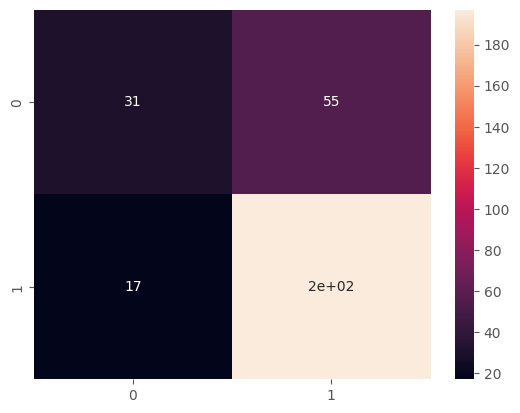

In [38]:
sns.heatmap(pd.DataFrame(cfmatrix_2), annot=True)

In [39]:
prediction2 = model2.predict(X_test)
prediction2


array(['good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', '

In [ ]:
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

In [ ]:
model3=clf.fit(X_train,Y_train)
prediction3=model3.predict(X_test)

In [ ]:
accuracy3 = accuracy_score(Y_test, prediction3)
print('Accuracy:', (accuracy3*100))
print(metrics.classification_report(Y_test, prediction3))
print(metrics.confusion_matrix(Y_test, prediction3))

Accuracy: 72.66666666666667
              precision    recall  f1-score   support

           0       0.53      0.47      0.49        86
           1       0.79      0.83      0.81       214

    accuracy                           0.73       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.72      0.73      0.72       300

[[ 40  46]
 [ 36 178]]


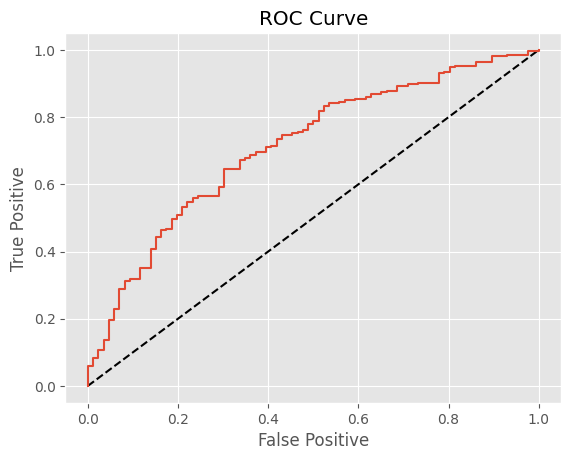

In [ ]:
y_pred_prob2 = model3.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.show()

In [58]:
#Export Model
import pickle
pickle.dump(model2, open('credit-final.pkl', 'wb'))

In [61]:
modelPickled =  pickle.load(open("credit-final.pkl", 'rb'))

In [62]:
modelPickled.predict(X_test)

array(['good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', '